In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

# dict, list, set, および tuple に代わる、特殊なコンテナデータ型を実装できる。
import collections

# WordCloud用のライブラリ
# https://amueller.github.io/word_cloud/
import wordcloud

# 英語による自然言語処理をする上で役に立つ NLTK(Natural Language Toolkit)
# https://qiita.com/m__k/items/ffd3b7774f2fde1083fa
import nltk

## 中谷修代の言語検出ライブラリ（2014/03/03からのバージョン）のPythonへの移植。
## language-detection は指定されたテキストが何語か判定するJavaのライブラリ
import langdetect 

## TextBlob() 翻訳が可能
## TextBlob().sentiment.polarityで感情分析
## https://textblob.readthedocs.io/en/dev/quickstart.html
from textblob import TextBlob

# spaCy 自然言語用のライブラリ
# https://spacy.io/
#  実務で需要が多いと思われる以下の2タスクが可能
# https://qiita.com/moriyamanaoto/items/e98b8a6ff1c8fcf8e293
# 固有表現抽出
# フレーズ抽出
import spacy

# テキストや画像などの形式で構成されるデータセットから、機械学習アルゴリズムでサポートされている形式で特徴を抽出できる
# https://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn import feature_extraction

# t-SNE [1]は、高次元データを視覚化するためのツールです。
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn import manifold

# このモジュールは、データセット/モデルのダウンロード、情報の取得、およびロードのためのAPIです。
# https://radimrehurek.com/gensim/downloader.html
import gensim.downloader as gensim_api

## 主にテキスト解析を対象としたスケーラブルな機械学習ライブラリで、Word2VecやDoc2VecをシンプルなAPIで利用することができる。
import gensim

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

### データの読み込み

In [14]:
path = os.getcwd() + "/"

In [15]:
train = pd.read_csv(path + "train.csv")
test  = pd.read_csv(path + "test.csv")

In [21]:
print("train")
display(train.head())
display(train.tail())
print("keyword")
display(train["keyword"].value_counts())
display(train["keyword"].unique().shape)
print()
print("location")
display(train["location"].value_counts())
display(train["location"].unique().shape)
display(train.shape)

print("test")
display(test.head())
display(test.tail())
print("keyword")
display(train["keyword"].value_counts())
display(train["keyword"].unique().shape)
print()
print("location")
display(train["location"].value_counts())
display(train["location"].unique().shape)
display(test.shape)

train


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


keyword


fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
sinking                  41
damage                   41
siren                    40
windstorm                40
fear                     40
collided                 40
outbreak                 40
twister                  40
evacuate                 40
weapon                   39
derailment               39
hellfire                 39
wrecked                  39
wreckage                 39
earthquake               39
flames                   39
sinkhole                 39
whirlwind                39
famine                   39
collision                39
sunk                     39
weapons                  39
explosion                39
explode                  38
drowned                  38
derailed                 38
ambulance                38
deaths                   38
oil%20spill              38
typhoon                  38
fire                

(222,)


location


USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
 Tropical SE FLorida              1
U.S.A. - Global Members Site      1
Twitterville                      1
Here And There                    1
S.F. Bay area                     1
Name: location, Length: 3341, dtype: int64

(3342,)

(7613, 5)

test


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


keyword


fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
sinking                  41
damage                   41
siren                    40
windstorm                40
fear                     40
collided                 40
outbreak                 40
twister                  40
evacuate                 40
weapon                   39
derailment               39
hellfire                 39
wrecked                  39
wreckage                 39
earthquake               39
flames                   39
sinkhole                 39
whirlwind                39
famine                   39
collision                39
sunk                     39
weapons                  39
explosion                39
explode                  38
drowned                  38
derailed                 38
ambulance                38
deaths                   38
oil%20spill              38
typhoon                  38
fire                

(222,)


location


USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
 Tropical SE FLorida              1
U.S.A. - Global Members Site      1
Twitterville                      1
Here And There                    1
S.F. Bay area                     1
Name: location, Length: 3341, dtype: int64

(3342,)

(3263, 4)

In [5]:
# location は多すぎるのでカット
train = train.drop("location", axis=1)
test = test.drop("location", axis=1)

In [6]:
# keyword の null値カウント
print(train["keyword"].isnull().sum())
print(test["keyword"].isnull().sum())

61
26


### 記号 （ ' や ! や その他諸々）の入ったテキストの確認

In [7]:
print("train")
display(train[train["text"].str.contains(r'[^\s\w]')].head())
display(train[train["text"].str.contains(r'[^\s\w]')].tail())
display(train[train["text"].str.contains(r'[^\s\w]')]["text"].count().sum())
display(train[train["text"].str.contains(r'[^\s\w]')]["text"].count().sum()/train["text"].count().sum()*100)

print("test")
display(test[test["text"].str.contains(r'[^\s\w]')].head())
display(test[test["text"].str.contains(r'[^\s\w]')].tail())
display(test[test["text"].str.contains(r'[^\s\w]')]["text"].count().sum())
display(test[test["text"].str.contains(r'[^\s\w]')]["text"].count().sum()/test["text"].count().sum()*100)

train


,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,text,target
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,The Latest: More Homes Razed by Northern Calif...,1


7277

95.58649678182057

test


,id,keyword,text
1,2,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,Apocalypse lighting. #Spokane #wildfires
5,12,NaN,We're shaking...It's an earthquake
6,21,NaN,They'd probably still show more life than Arse...


,id,keyword,text
3258,10861,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,#CityofCalgary has activated its Municipal Eme...


3126

95.80140974563285

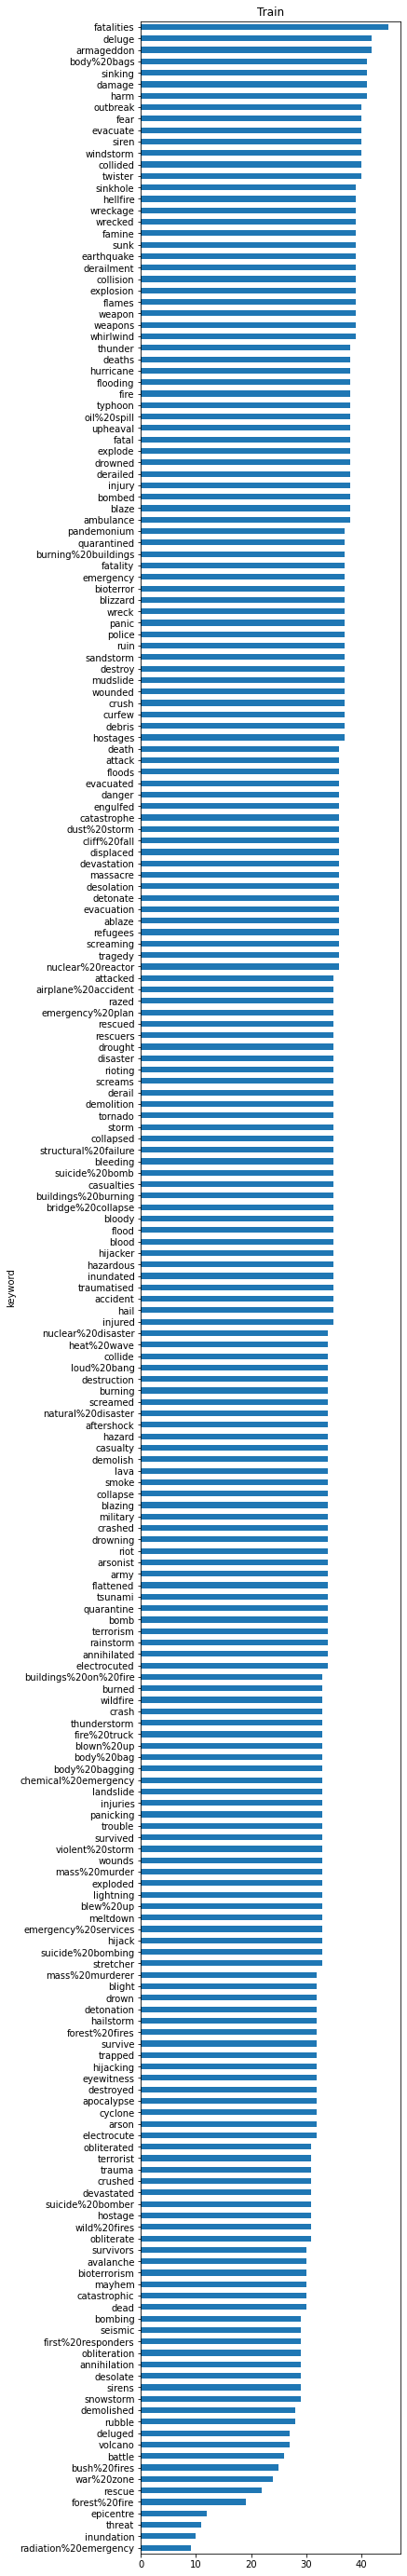

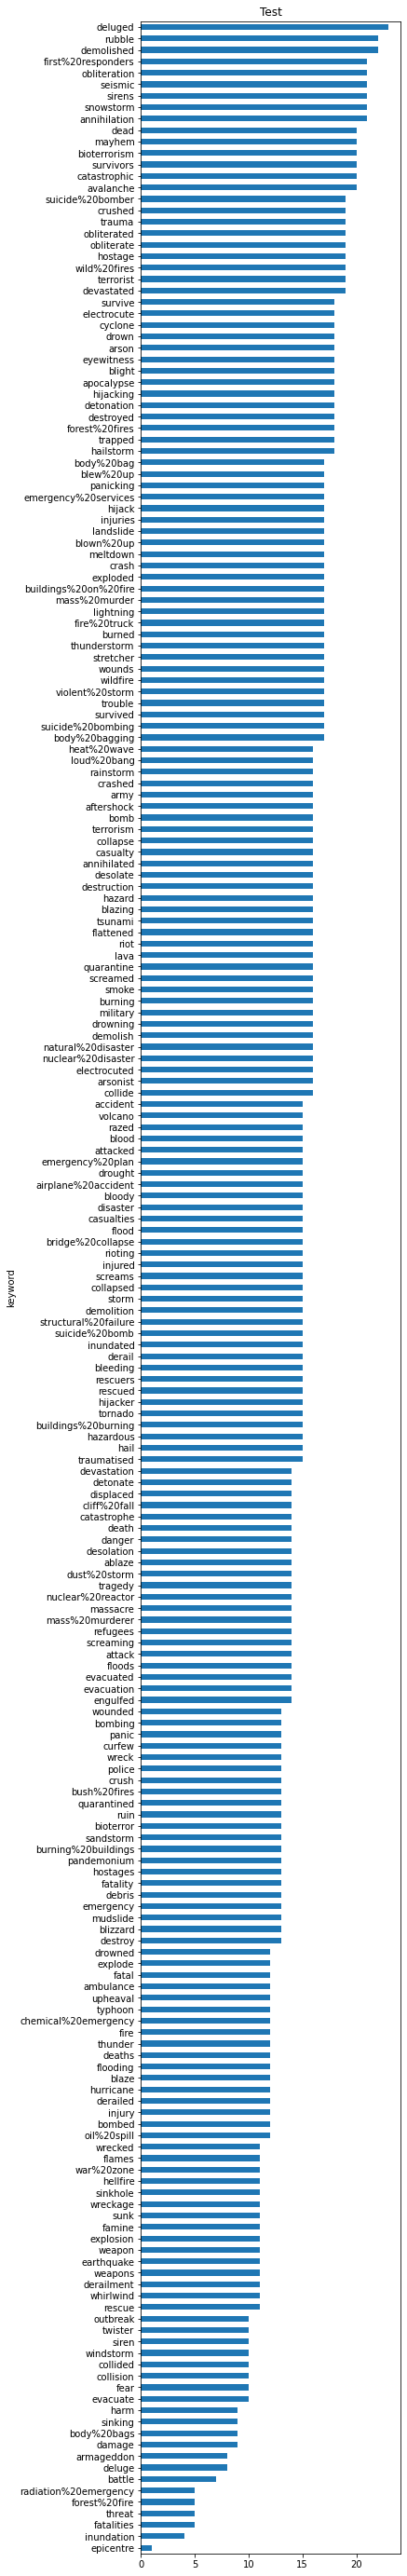

In [8]:
train["keyword"].reset_index().groupby("keyword").count().sort_values(by="index").plot(kind="barh", title='Train', legend=False, figsize=(5,50))
test["keyword"].reset_index().groupby("keyword").count().sort_values(by="index").plot(kind="barh", title='Test', legend=False, figsize=(5,50))

### 何語なのか判定

In [22]:
train['lang'] = train["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")

test['lang'] = train["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")

display(train.head())
display(test.head)

,id,keyword,location,text,target,lang
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en


<bound method NDFrame.head of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text lang  
0                    Just happened a terrible car crash   en  
1     Heard about #earthquake is different cities, s...   en  
2     there is a forest fire at spot pond, geese are...   en  
3              Apocalypse lighting. #Spokane #wildfires   en  
4         Typhoon Soudelor kills 28 in China and Taiwan   en  
...                                                 ...  ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...   en  
3259  Storm in RI worse than last hurricane. My city...   en  
3260  Green Line d